In [7]:
import pandas as pd
import numpy as np  
from sklearn import datasets
# import matplotlib and set inline for jupyter notebook
import matplotlib.pyplot as plt

# Relationship

### Scatter

In [8]:
# Source: https://www.kaggle.com/benhamner/python-data-visualizations

# load the iris data
iris = datasets.load_iris()

In [9]:
# Build a DataFrame for iris dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target']=iris.target
iris_df['species'] = iris_df['target'].map({0:iris.target_names[0],
                                            1:iris.target_names[1],
                                            2:iris.target_names[2]})


In [36]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


Text(0, 0.5, 'sepal width (cm)')

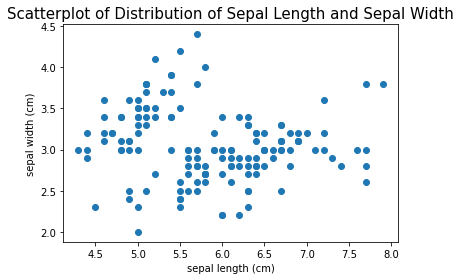

In [11]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.title('Scatterplot of Distribution of Sepal Length and Sepal Width', fontsize=15)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

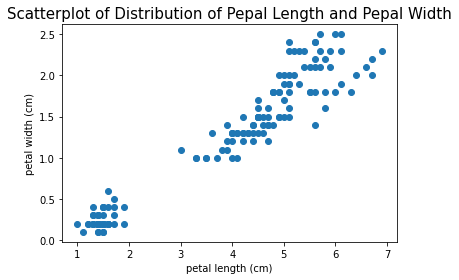

In [12]:
# Explore other
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'])
plt.title('Scatterplot of Distribution of Pepal Length and Pepal Width', fontsize=15)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Comparison

# Data over time
Sometimes it isn’t enough to know that a relationship exists between variables; in some cases, better analysis is possible if we can also visualize when the relationship took place. Because relationships are denoted with links between variables, the date/time appears as a link property. This visualization method shows data over the period to find trends or changes over time.

In [14]:
# Build data frame from inputted data
data = pd.DataFrame(data = {'Month': ['Jan', 'Feb', 'March', 'April','May','June',
                                      'July', 'Aug', 'Sept', 'Oct','Nov','Dec'],
 'All Views': [728820, 862775, 1001285,817075,973996,877365,
              539134, 978768, 1792495, 569553, 989850, 1012303],
 'Internal Views': [374872, 466159, 578368,530037,608158,543964,
                   345293, 485921, 843923, 284741, 494991, 472819],
 'External Views': [260911, 301914,310423,197089,237425,226267,
                   193841, 492847, 948572, 284712, 494859, 539484]})
data.to_csv('Views.csv')
data

,Month,All Views,Internal Views,External Views
0,Jan,728820,374872,260911
1,Feb,862775,466159,301914
2,March,1001285,578368,310423
3,April,817075,530037,197089
4,May,973996,608158,237425
5,June,877365,543964,226267
6,July,539134,345293,193841
7,Aug,978768,485921,492847
8,Sept,1792495,843923,948572
9,Oct,569553,284741,284712


In [15]:
data = pd.read_csv('Views.csv',index_col=0)
data

,Month,All Views,Internal Views,External Views
0,Jan,728820,374872,260911
1,Feb,862775,466159,301914
2,March,1001285,578368,310423
3,April,817075,530037,197089
4,May,973996,608158,237425
5,June,877365,543964,226267
6,July,539134,345293,193841
7,Aug,978768,485921,492847
8,Sept,1792495,843923,948572
9,Oct,569553,284741,284712


### Line chart

Text(0.5, 1.0, 'Line Chart of All Views')

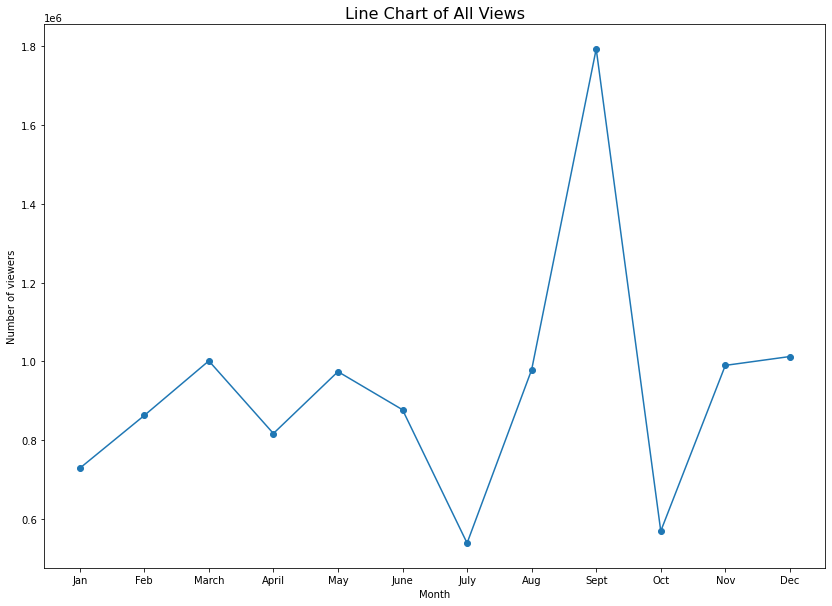

In [16]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.plot(data['Month'], data['All Views'], marker='o')

# set label and title for the plot
plt.xlabel('Month')
plt.ylabel('Number of viewers')
plt.title('Line Chart of All Views', fontsize = 16)

### Area chart

Text(0.5, 1.0, 'Area Chart of External Views')

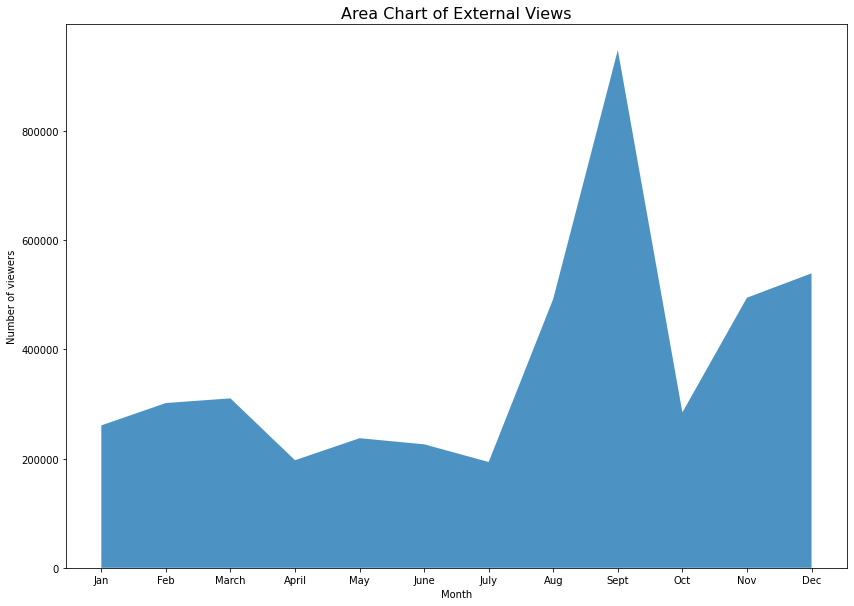

In [17]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.stackplot(data['Month'], data['External Views'], alpha=0.8)

# set label and title for the plot
plt.xlabel('Month')
plt.ylabel('Number of viewers')
plt.title('Area Chart of External Views', fontsize = 16)

# Practice: what can you do to plot both internal and external views?

### Stacked area chart

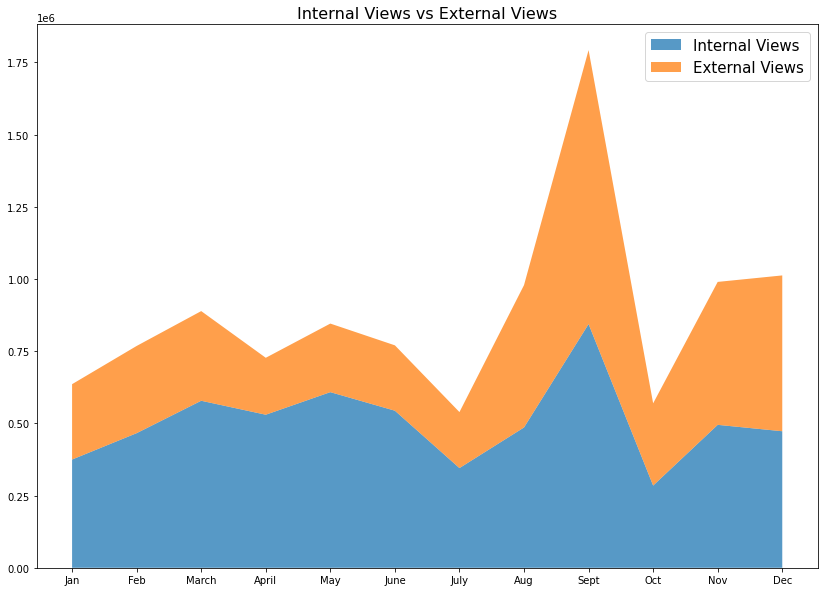

In [18]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.stackplot(data['Month'], data['Internal Views'], data['External Views'],
              alpha=0.75,
#               colors=['#7289da','#f29fa9'],
            labels=['Internal Views', 'External Views'])


# set a title and a legend
plt.title('Internal Views vs External Views', fontsize=16)
plt.legend(fontsize=15)

### Area chart unstacked

In [19]:
x = data['Internal Views']
y = data['External Views']

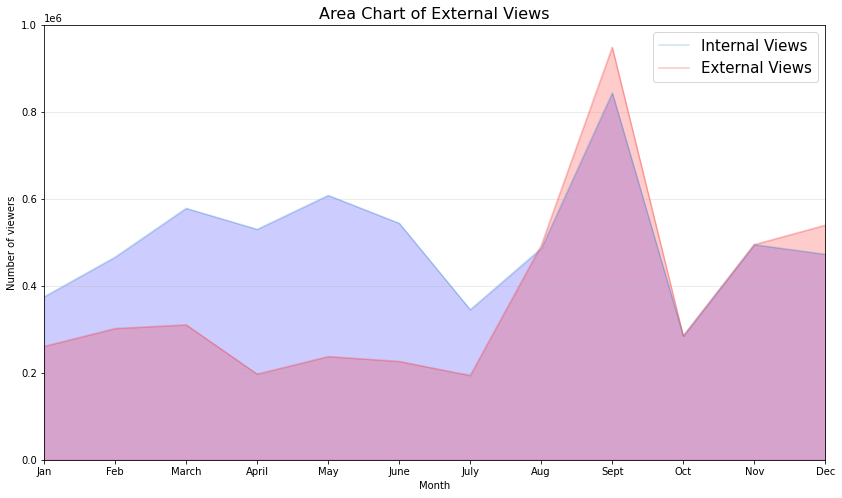

In [20]:
# instanciate the figure
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot()

# plot the data
ax.plot(x, color='#49a7c3', alpha=0.3, label='Internal Views')
ax.plot(y, color='#f04747', alpha=0.3, label='External Views')

# fill the areas between the plots and the x axis
# this can create overlapping areas between lines
ax.fill_between(x.index, 0, x, color='blue', alpha=0.2)
ax.fill_between(x.index, 0, y, color='red', alpha=0.2)

# set ticks, label and title for the plot
plt.xticks(np.arange(12), data['Month'])
plt.xlabel('Month')
plt.ylabel('Number of viewers')
plt.title('Area Chart of External Views', fontsize = 16)


# change the x-ylim
ax.set_xlim(0, data.index[-1])
ax.set_ylim(0, 1e6)


# set a legend and the y grid for the plot
ax.legend(fontsize=15)
ax.grid(axis='y', alpha=0.3)

# Comparison Among Items

# Bar chart

# Vertical Bar Chart

In [42]:
car = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')
car

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [43]:
# prepare data
value_count =  car["manufacturer"].value_counts(sort=True)
# value_count = value_count[:11,]
value_count

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: manufacturer, dtype: int64

# can we make it better

Text(0.5, 1.0, 'Number of Vehicles per Manufacturer')

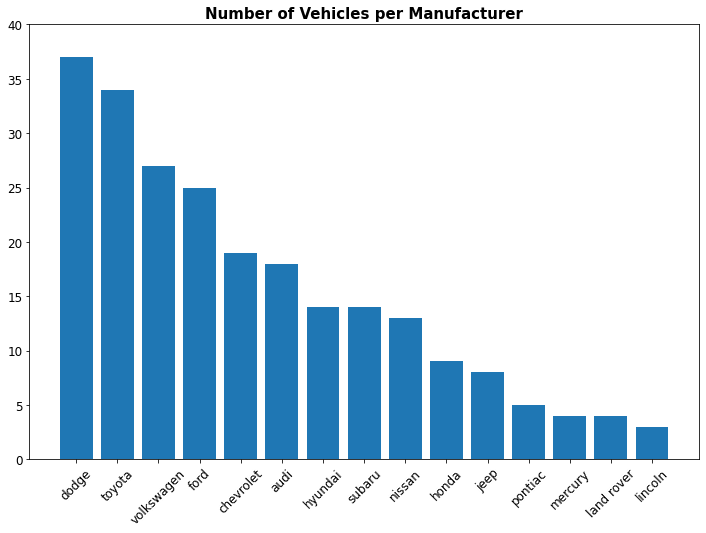

In [44]:
# instanciate the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
ax.bar(value_count.index, value_count.values) # color=colors to add color


# size of the x and y ticks
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# change the ylim
ax.set_ylim(0, 40)

# set a title for the plot
ax.set_title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Number of Vehicles per Manufacturer')

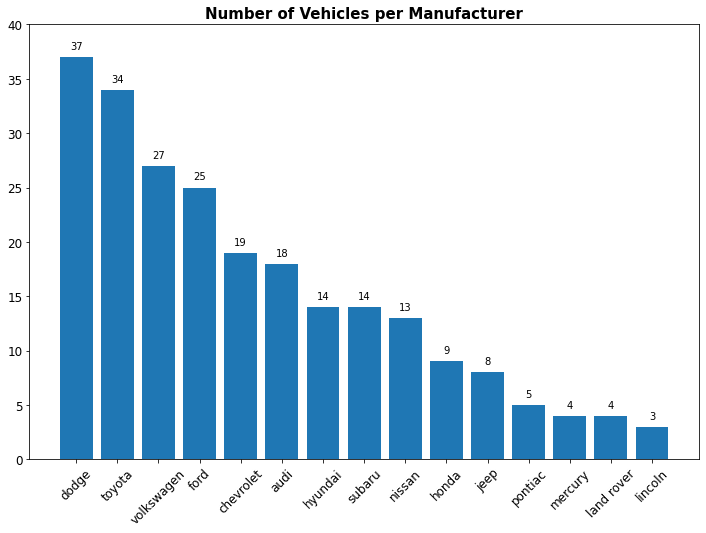

In [45]:
# instanciate the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
ax.bar(value_count.index, value_count.values) # color=colors to add color

# iterate over every x and y and annotate the value on the top of the barchart
for i, (k, v) in enumerate(value_count.items()):
    ax.text(k, # where to put the text on the x coordinates
            v + 1, # where to put the text on the y coordinates
            v, # value to text
            #color=colors[i], # color corresponding to the bar
            fontsize=10, # fontsize
            horizontalalignment='center', # center the text to be more pleasant
            verticalalignment='center'
           )


# size of the x and y ticks
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# change the ylim
ax.set_ylim(0, 40)

# set a title for the plot
ax.set_title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold')

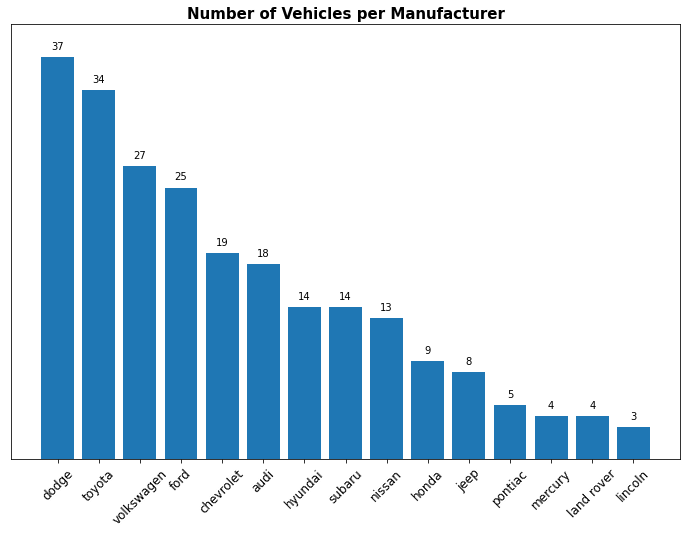

In [46]:
# instanciate the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
ax.bar(value_count.index, value_count.values) # color=colors to add color

# iterate over every x and y and annotate the value on the top of the barchart
for i, (k, v) in enumerate(value_count.items()):
    ax.text(k, # where to put the text on the x coordinates
            v + 1, # where to put the text on the y coordinates
            v, # value to text
            #color=colors[i], # color corresponding to the bar
            fontsize=10, # fontsize
            horizontalalignment='center', # center the text to be more pleasant
            verticalalignment='center'
           )


# size of the x and y ticks
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# change the ylim
ax.set_ylim(0, 40)

# set a title for the plot
ax.set_title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold')
ax.get_yaxis().set_visible(False)

### Horizontal bar chart

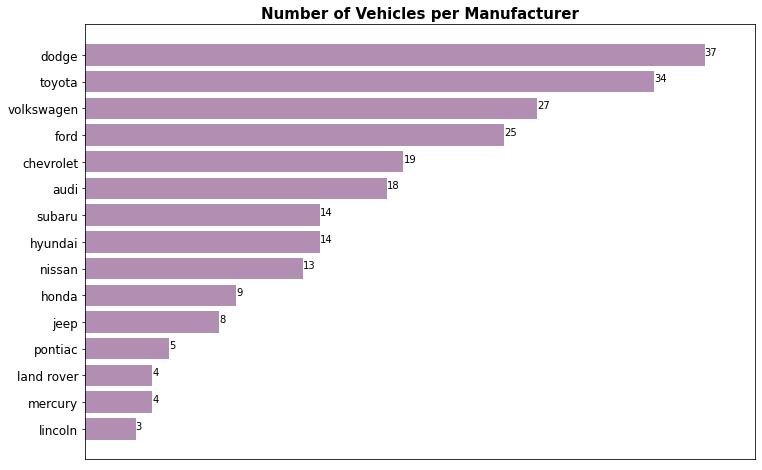

In [47]:
value_count = value_count.sort_values()
# Vertical bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()


# plot the data using matplotlib
plt.barh(value_count.index, value_count.values, color='#b28eb2')

for index, value in enumerate(value_count.values):
    plt.text(value, index, str(value))


# size of the x and y ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# change the ylim
ax.set_xlim(0, 40)

# set a title for the plot
ax.set_title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold');
ax.get_xaxis().set_visible(False)

### Stacked bar chart

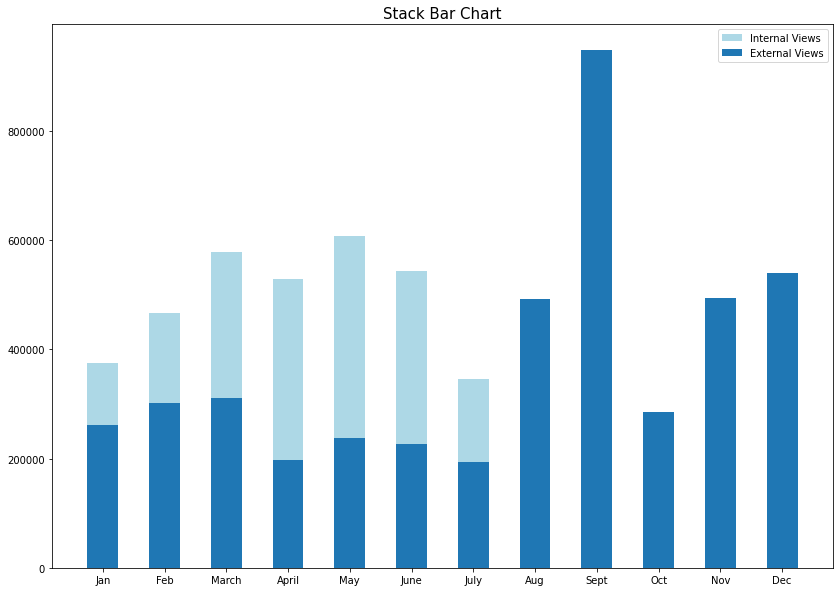

In [48]:
fig = plt.figure(figsize=(14,10))
rect1 = plt.bar(data['Month'] ,data['Internal Views'],
                width=0.5, color='lightblue')
rect2 = plt.bar(data['Month'], data['External Views'],
                width=0.5, color='#1f77b4')

plt.legend((rect1[0], rect2[0]), ('Internal Views', 'External Views'))
plt.title('Stack Bar Chart', fontsize=15)
plt.show()

# Distribution

### Histogram

Text(0.5, 1.0, 'Sepal Width (cm)')

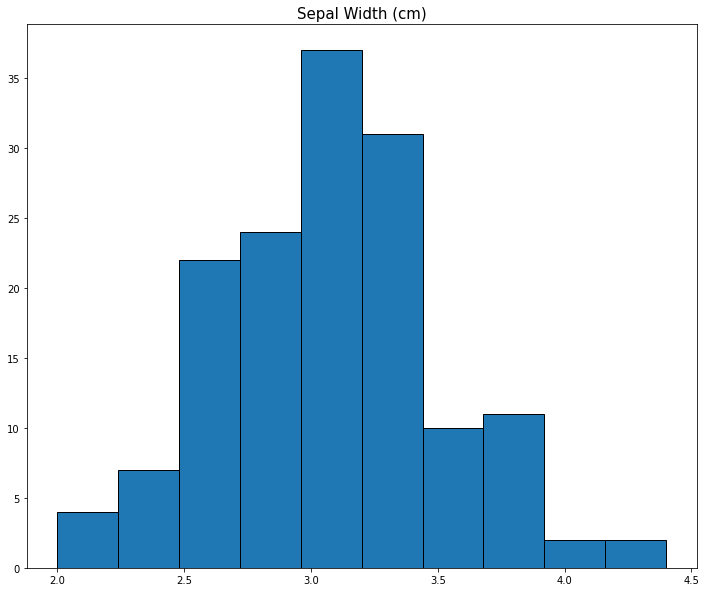

In [49]:
fig = plt.figure(figsize=(12,10))
plt.hist(iris_df['sepal width (cm)'], edgecolor = 'black')
plt.title('Sepal Width (cm)', fontsize=15)

# Boxplot

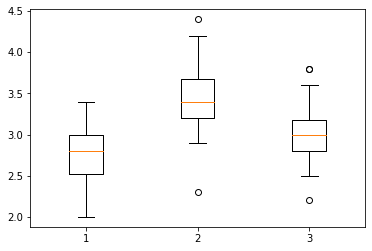

In [39]:
# (iris_df['sepal width (cm)'],)
versicolor = iris_df[iris_df['species']=='versicolor']['sepal width (cm)']
setosa = iris_df[iris_df['species']=='setosa']['sepal width (cm)']
virginica = iris_df[iris_df['species']=='virginica']['sepal width (cm)']


plt.boxplot((versicolor,setosa,virginica) )
plt.show()

### Composition

### Pie chart

Iris dataset

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
a = iris_df['species'].value_counts()
a

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

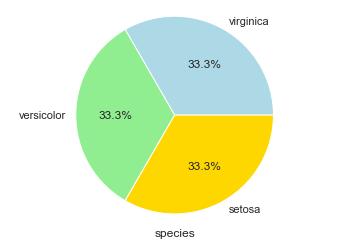

In [ ]:
species = a.index
count = a.values
colors= ['lightblue','lightgreen','gold']

# explode = (0,0.2,0)
plt.pie(count, labels=species,
#         shadow=True,
        colors=colors, 
#         explode = explode, 
        autopct='%1.1f%%')
plt.xlabel('species')
plt.axis('equal')
plt.show()